# 1. **Overview**
Multi-Output Flower Analysis System
This notebook implements a deep learning model to:- Classify flower type from images

In [7]:
#importing all the packages
import random
from PIL import Image
import numpy as np
import os

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning and image preprocessing
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [3]:
# Evaluation metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_curve,
    auc
)

# Data Gathering

In [4]:

# Base directory containing the flower image folders
df= '/content/drive/MyDrive/flowers'

# Data Preprocessing

In [8]:
# Dimensions for display (height, width)
img_size = (150, 150)

# Retrieve class names from the subdirectory names
classes = os.listdir(df)  # e.g., ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Number of example images to draw per class
samples_per_class = 3
num_classes = 5
batch_size  = 32

# Data Visualization

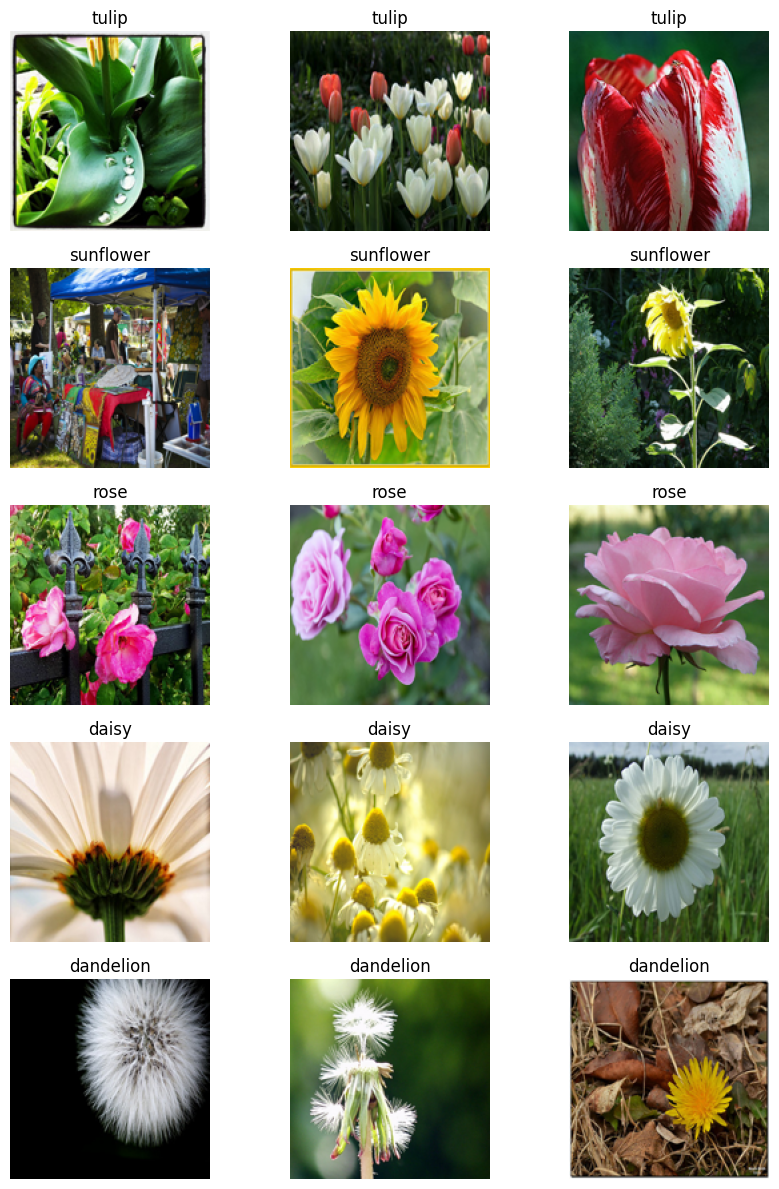

In [14]:
# Plot a grid of sample images from each class
plt.figure(figsize=(9, 12))
plot_idx = 1

for cls in classes:
    cls_dir = os.path.join(df, cls)
    img_files = os.listdir(cls_dir)
    chosen = random.sample(img_files, samples_per_class)
    for img_name in chosen:
        img_path = os.path.join(cls_dir, img_name)
        img = Image.open(img_path).resize(img_size)
        ax = plt.subplot(len(classes), samples_per_class, plot_idx)
        plt.imshow(np.array(img) / 255.0)      # display image normalized to [0,1]
        plt.title(cls)                        # show class name as title
        plt.axis('off')                       # hide axes for clarity
        plot_idx += 1

plt.tight_layout()
plt.show()

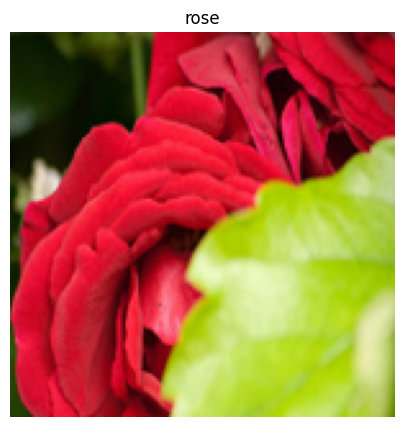

In [15]:
# Define class names and target image size
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
img_size = (150, 150)

# Randomly pick one class and one image from that class
chosen_class = random.choice(classes)
class_dir = os.path.join(df, chosen_class)
img_name = random.choice(os.listdir(class_dir))
img_path = os.path.join(class_dir, img_name)

# Load and resize the image
img = Image.open(img_path).resize(img_size)

# Plot the selected image
plt.figure(figsize=(5, 5))
plt.imshow(np.array(img) / 255.0)  # normalize pixel values to [0,1]
plt.title(chosen_class)            # display the class name
plt.axis('off')                    # hide axes for a cleaner look
plt.show()

#Model Architecture

In [16]:
model = models.Sequential([

    # First convolutional block: 32 filters
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(*img_size, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    # Second convolutional block: 64 filters
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),    # apply batch normalization after convolution
    layers.MaxPooling2D(2,2),

    # Third convolutional block: 128 filters
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),    # optionally normalize before the final Dense
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Print the model summary to inspect its architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,039,173 (72.63 MB)

 Trainable params: 19,037,701 (72.62 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [17]:
# Callback to reduce the learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',    # watch validation loss
    factor=0.5,            # reduce LR by a factor of 0.5
    patience=3,            # wait 3 epochs before reducing
    min_lr=1e-6,           # do not go below this LR
    verbose=1              # print messages when LR is reduced
)

In [18]:
# Callback to stop training early if validation loss doesn't improve
early_stop = EarlyStopping(
    monitor='val_loss',         # watch validation loss
    patience=7,                 # stop after 7 epochs without improvement
    restore_best_weights=True,  # roll back to best weights at stop
    verbose=1                   # print messages when stopping
)

# Model Traning

In [21]:
# Train the model with both callbacks
history = model.fit(
    train_generator,
    epochs=20,                   # maximum number of epochs
    validation_data=validation_generator,
    callbacks=[reduce_lr, early_stop]
)

Epoch 1/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2721s 25s/step - accuracy: 0.4690 - loss: 1.6956 - val_accuracy: 0.2442 - val_loss: 3.9837 - learning_rate: 0.0010
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 333s 3s/step - accuracy: 0.5821 - loss: 1.0873 - val_accuracy: 0.2442 - val_loss: 4.8550 - learning_rate: 0.0010
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 346s 3s/step - accuracy: 0.6173 - loss: 0.9896 - val_accuracy: 0.3116 - val_loss: 1.9894 - learning_rate: 0.0010
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 358s 3s/step - accuracy: 0.6381 - loss: 0.9294 - val_accuracy: 0.4651 - val_loss: 1.5505 - learning_rate: 0.0010
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - accuracy: 0.6516 - loss: 0.8795 - val_accuracy: 0.5105 - val_loss: 1.2704 - learning_rate: 0.0010
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 384s 3s/step - accuracy: 0.6670 - loss: 0.8560 - val_accuracy: 0.5407 - val_loss: 1.1919 - learning_rate: 0.0010
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.7000 - loss: 

# Evaluation

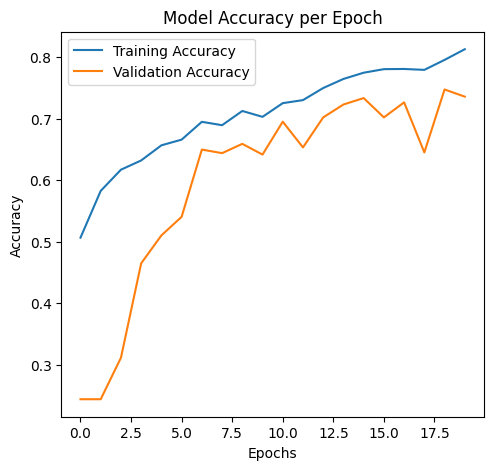

In [22]:
# Plotting model performance: Accuracy and Loss
# ---------------------------------------
plt.figure(figsize=(12, 5))

# Plotting Accuracy over epochs
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(False)  # adiciona grid leve

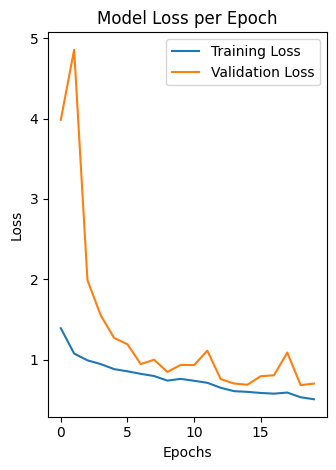

In [23]:
# Plotting Loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)  # adiciona grid leve

plt.tight_layout()

In [24]:
num_steps = validation_generator.samples // validation_generator.batch_size + 1

# Predict probabilities for each class
Y_pred = model.predict(validation_generator, steps=num_steps)

# Convert predicted probabilities to class indices
y_pred = np.argmax(Y_pred, axis=1)

# Get the true class indices from the generator
y_true = validation_generator.classes

27/27 ━━━━━━━━━━━━━━━━━━━━ 23s 801ms/step


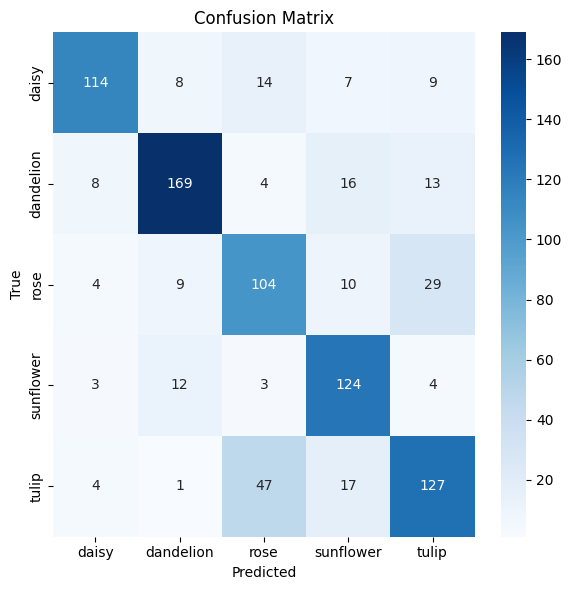

In [25]:
# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = list(validation_generator.class_indices.keys())

# 3. Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(
    cm,
    annot=True,            # annotate cells with counts
    fmt='d',               # integer format
    xticklabels=labels,    # set x-axis labels to class names
    yticklabels=labels,    # set y-axis labels to class names
    cmap='Blues'           # use a blue color map
)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [26]:
#Classification report
print(classification_report(y_true, y_pred, target_names=labels))

              precision    recall  f1-score   support

       daisy       0.86      0.75      0.80       152
   dandelion       0.85      0.80      0.83       210
        rose       0.60      0.67      0.63       156
   sunflower       0.71      0.85      0.78       146
       tulip       0.70      0.65      0.67       196

    accuracy                           0.74       860
   macro avg       0.74      0.74      0.74       860
weighted avg       0.75      0.74      0.74       860



In [28]:
#1. Prepare y_true and y_pred_proba for the entire validation set
#    Adjust 'steps' to cover all validation samples
steps = validation_generator.samples // validation_generator.batch_size + 1
y_true = validation_generator.classes

# Convert true labels to one-hot encoding for multiclass ROC
y_true_ohe = to_categorical(y_true, num_classes=num_classes)

# Generate probability predictions for the whole set
y_pred_proba = model.predict(validation_generator, steps=steps)#

27/27 ━━━━━━━━━━━━━━━━━━━━ 22s 824ms/step


In [29]:
# Overall accuracy on the validation set
y_pred = np.argmax(y_pred_proba, axis=1)
acc = accuracy_score(y_true, y_pred)
print(f'Validation set accuracy: {acc:.4f}')

Validation set accuracy: 0.7663


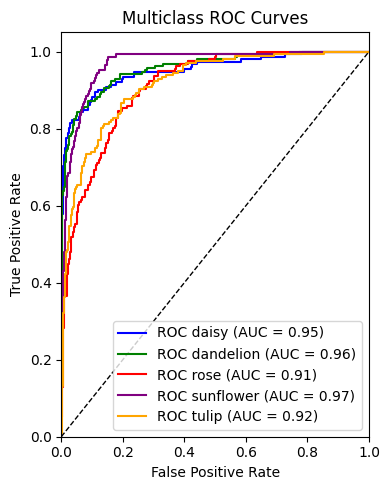

In [31]:
# 3. Multiclass ROC curve (one-vs-all)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 4. Plot the ROC curves
plt.figure(figsize=(4, 5))
colors = ['blue', 'green', 'red', 'purple', 'orange']
labels = list(validation_generator.class_indices.keys())

for i, color in enumerate(colors[:num_classes]):
    plt.plot(
        fpr[i], tpr[i], color=color,
        label=f'ROC {labels[i]} (AUC = {roc_auc[i]:.2f})'
         )

# Plot the random-chance line
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves')
plt.legend(loc='lower right')
plt.grid(False)
plt.tight_layout()
plt.show()

# Prediction

In [32]:
# Number of images to display
num_images = 15

# Compute grid layout
n_cols = 5
n_rows = int(np.ceil(num_images / n_cols))

# Retrieve one batch from the validation generator
x_batch, y_batch = next(validation_generator)

# Make predictions on the batch
y_probs = model.predict(x_batch)
y_pred = np.argmax(y_probs, axis=1)
y_true = np.argmax(y_batch, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


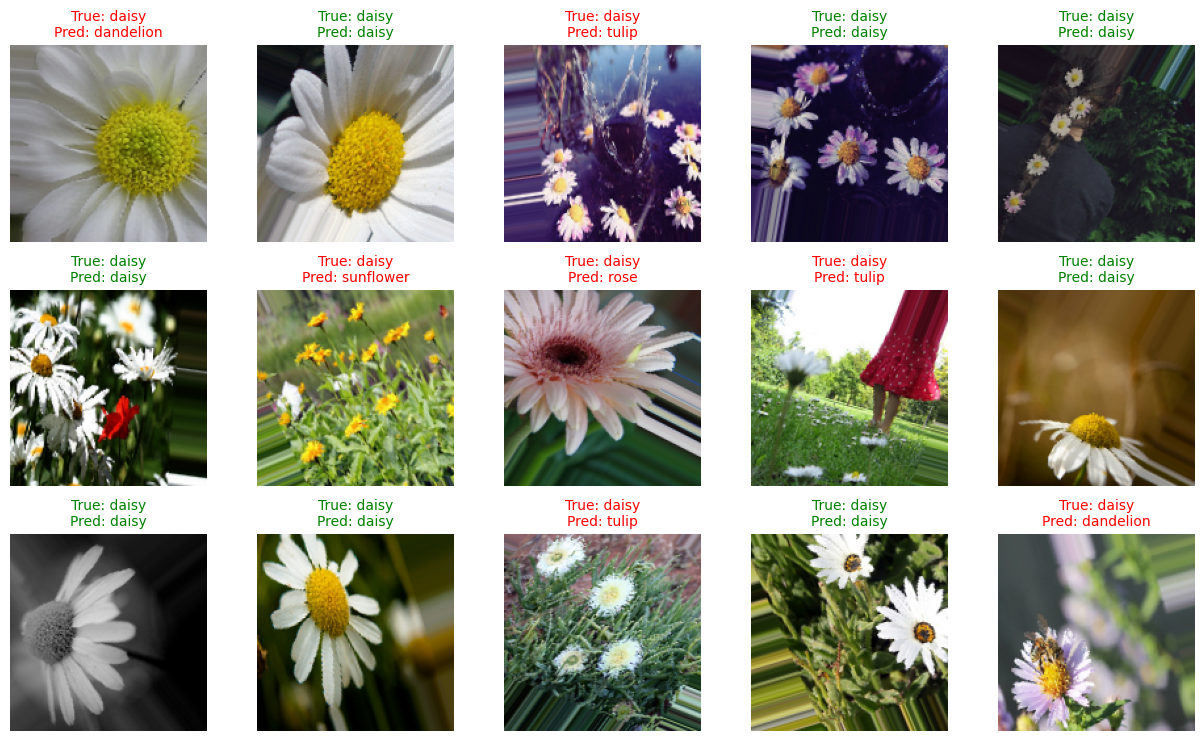

In [33]:
# Plot the validation batch with true vs. predicted labels
plt.figure(figsize=(n_cols * 2.5, n_rows * 2.5))

for i in range(num_images):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(x_batch[i])  # display the i-th image
    true_label = classes[y_true[i]]
    pred_label = classes[y_pred[i]]
    # color the title green if correct, red if incorrect
    color = 'green' if y_true[i] == y_pred[i] else 'red'
    plt.title(f'True: {true_label}\nPred: {pred_label}', color=color, fontsize=10)
    plt.axis('off')  # hide axes

plt.tight_layout()
plt.show()